In [1]:
import functools
from multiprocessing import Pool
import os

import numpy as np
import scipy.optimize as optimize
from scipy import integrate 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('xtick', labelsize="large") 
matplotlib.rc('ytick', labelsize="large") 
%matplotlib inline

import experiment

In [2]:
# load data
data2011 = np.loadtxt("data/emission/gt_2011.csv",skiprows=1,delimiter=',')
data2012 = np.loadtxt("data/emission/gt_2012.csv",skiprows=1,delimiter=',')
data2013 = np.loadtxt("data/emission/gt_2013.csv",skiprows=1,delimiter=',')
data2014 = np.loadtxt("data/emission/gt_2014.csv",skiprows=1,delimiter=',')
data2015 = np.loadtxt("data/emission/gt_2015.csv",skiprows=1,delimiter=',')
data = np.concatenate((data2011,data2012,data2013,data2014,data2015), axis=0)
y = data[:, -1]
x = data[:, :-2]
(n, d) = np.shape(x)

In [4]:
# set constants
cu = 110
cl = 40
sigma = 1.
alpha = 0.3

In [5]:
if __name__ ==  '__main__': 
    num_processors = os.cpu_count()
    epsilons = np.array([1., 2.5, 5, 10])
    num_trials = 1000
    ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])

    his = np.zeros((len(epsilons), len(ns), num_trials, d))
    
    for j, epsilon in enumerate(epsilons):
        expe = functools.partial(experiment.experiment, x=x, y=y, sigma=sigma, alpha=alpha, epsilon=epsilon, cu=cu, cl=cl)
        for k, n_dash in enumerate(ns):
            with Pool(processes = num_processors) as p:
                output = np.array(p.map(expe,np.ones(num_trials,dtype=int)*ns[k]))
            his[j, k] = output

In [4]:
epsilons = np.array([1., 2.5, 5, 10])
num_trials = 1000
ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])
covs = np.zeros((len(epsilons), len(ns)))
for j in range(len(epsilons)):
    for k in range(len(ns)):
        covs[j, k] = np.linalg.norm(np.cov((his[j, k]-np.average(his[j,k], axis=0)).transpose()))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


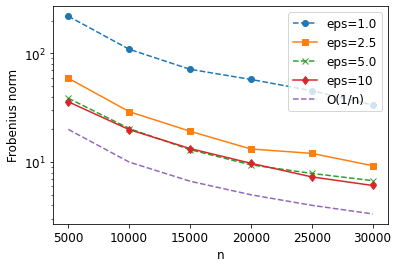

In [9]:
plot = plt.semilogy # log scale
# plot = plt.plot # linear scale
plot(ns, covs[0], "--o", label="eps=1.0")
plot(ns, covs[1], "-s", label="eps=2.5")
plot(ns, covs[2], "--x", label="eps=5.0")
plot(ns, covs[3], "-d", label="eps=10")
plot(ns, 100000/ns, "--", label="O(1/n)")
plt.xlabel("n",fontsize="large")
plt.ylabel("Frobenius norm",fontsize="large")
plt.legend(fontsize="large")
# plt.savefig("covs_emission.eps") # save the figure
plt.show()